# Elipsa kovariancie dvojrozmerného rozdelenia

Hodnoty dvojrozmerného normálneho rozdelenia $X = [X_1, \, X_2]$ zobrazené v rovine sú ohraničené elipsou, stred elipsy je určený vektorom strednej hodnoty,
smer osí elipsy je určený vlastnými vektormi $\textbf{v}$ a ich veľkosť vlastnými hodnotami $\lambda$ matice kovariancie. Hodnoty vlastných vektorov a vlastných hodnôt matice kovariancie určíme známym postupom 

\begin{equation}
\Sigma \textbf{v} = \lambda \textbf{v}  
\end{equation}

\begin{equation}
(\Sigma - \lambda I) \textbf{v} = 0 
\end{equation}

\begin{equation}
\begin{bmatrix}
  \sigma_1^2 & \sigma_{12}  \\
  \sigma_{12} & \sigma_2^2  \\
  \end{bmatrix} \,
  \begin{bmatrix}
  v_x \\
  v_y \\
  \end{bmatrix} -
  \begin{bmatrix}
  \lambda & 0  \\
  0 & \lambda  \\
  \end{bmatrix} \,
  \begin{bmatrix}
  v_x \\
  v_y \\
  \end{bmatrix} =
  \begin{bmatrix}
  0 \\
  0 \\
  \end{bmatrix}
\end{equation}

\begin{equation}
\begin{bmatrix}
  \sigma_1^2 - \lambda & \sigma_{12}  \\
  \sigma_{12} & \sigma_2^2 - \lambda  \\
  \end{bmatrix} \,
  \begin{bmatrix}
  v_x \\
  v_y \\
  \end{bmatrix} =
  \begin{bmatrix}
  0 \\
  0 \\
  \end{bmatrix}
\end{equation}

\begin{equation}
\text{Ak} \quad 
  \begin{bmatrix}
    v_x \\
    v_y \\
  \end{bmatrix} \neq 0, \quad \text{potom} \quad
det \begin{bmatrix}
      \sigma_1^2 - \lambda & \sigma_{12}           \\
      \sigma_{12}          & \sigma_2^2 - \lambda  \\
    \end{bmatrix}  = 0
\end{equation}

\begin{equation}
(\sigma_1^2 - \lambda)(\sigma_2^2 - \lambda) - \sigma_{12}^2 =0
\end{equation}

\begin{equation}
\lambda^2 - (\sigma_1^2 + \sigma_2^2)\lambda  + (\sigma_1^2 \sigma_2^2 - \sigma_{12}^2) =0
\end{equation}

\begin{equation}
\lambda_{1,2} = \frac{(\sigma_1^2 + \sigma_2^2) \pm \sqrt{(\sigma_1^2 + \sigma_2^2)^2 -4(\sigma_1^2 \sigma_2^2 - \sigma_{12}^2)}}{2}
\end{equation}

Z poslednej rovnice vypočítame hodnoty $\lambda_{1,2}$ a následne určíme hodnoty vlastných vektorov $\textbf{v}$. 

\begin{equation}
\begin{bmatrix}
  \sigma_1^2 - \lambda_{1,2} & \sigma_{12}  \\
  \sigma_{12} & \sigma_2^2 - \lambda_{1,2}  \\
  \end{bmatrix} \,
  \begin{bmatrix}
  v_x \\
  v_y \\
  \end{bmatrix} =
  \begin{bmatrix}
  0 \\
  0 \\
  \end{bmatrix}
\end{equation}

Vlastné vektory majú jednotkovú dĺžku a určujú smery hlavných osí elipsy. Menej namáhavým postupom je využitie funkcie <i>eigh()</i> z knižnice <i>numpy</i> pre výpočet vlastných hodnôt a vektorov symetrickej matice

In [1]:
%reset -f  
%matplotlib inline

from numpy import array
from numpy.linalg import eigh

m=array([0,0])               # stredne hodnoty 
S=array([[5, 2.5],[2.5, 2]]) # matica kovariancie
  
e,v = eigh(S)
print('Vlastne hodnoty\n',e)
print()
print('Vlastne vektory\n',v)

Vlastne hodnoty
 [ 0.58452405  6.41547595]

Vlastne vektory
 [[ 0.49269881 -0.87019991]
 [-0.87019991 -0.49269881]]


Rovnicu elipsy môžeme prepísať do maticovej formy

\begin{equation}
1=\frac{x^2}{a^2} + \frac{y^2}{b^2} = [x \,\, y] 
   \begin{bmatrix}
   {1}/{a^2} & 0  \\
    0  & {1}/{b^2} \\
  \end{bmatrix}
  \begin{bmatrix}
    x  \\
    y  \\
  \end{bmatrix}
  =
  \textbf{x}^T \Sigma \, \textbf{x}
\end{equation}


Z porovnania s maticou dvojrozmerného rozdelenia s nulovou kovarianciou vyplýva pre dĺžky osí elipsy rovnobežných so súradnicovými osami

\begin{equation}
   \begin{bmatrix}
    {1}/{a^2} & 0  \\
    0  & {1}/{b^2} \\
  \end{bmatrix}
  =
  \begin{bmatrix}
    \sigma_1^2 & 0  \\
    0  & \sigma_2^2 \\
  \end{bmatrix}
  =
  \begin{bmatrix}
    \lambda_1 & 0 \\
    0 & \lambda_2  \\
  \end{bmatrix}
\end{equation}


Rotácia elipsy je daná orientáciou vlastných vektorov, kde uhol otočenia je daný ako

\begin{equation}
\phi = atan \bigg(\frac{y_1}{x_1} \bigg)
\end{equation}

Rovnicu elipsy je treba naškálovať tak, aby obsahovala stanovený percentuálny počet hodnôt náhodných premenných. Pre určenie škálovacieho koeficientu môžeme použiť $\chi_i^2$ pre dve nezávislé náhodné premenná s s normovanými hodnotami v tvare

\begin{equation}
\frac{X_1^2}{\sigma_1^2} + \frac{X_2^2}{\sigma_2^2} = \chi_i^2(n)
\end{equation}

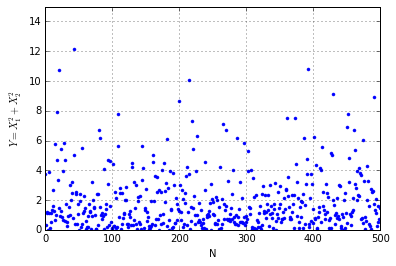

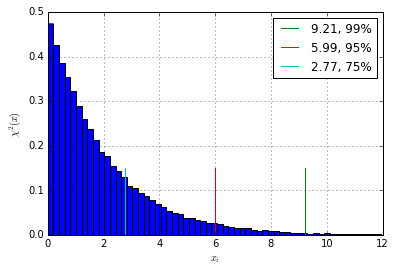

In [2]:
import pylab as plt
from numpy.random import normal

# Priklad - Zobrazenie CHI^2 rozdelenia

X1 = normal(0, 1, 100000)
X2 = normal(0, 1, 100000)

X1 = X1**2
X2 = X2**2
X = X1 + X2 

n=500
plt.plot(X[0:n], '.')
plt.ylim(0,15)
plt.xlim(0,n)
plt.xlabel('N')
plt.ylabel('$Y = X_1^2 + X_2^2$')
plt.grid()
plt.show()

plt.hist(X, 100, normed=1) #, histtype='step')
plt.ylim(0,0.5)
plt.xlim(0,12)
plt.xlabel('$x_i$')
plt.ylabel('$\chi^2(x)$')
plt.plot([9.21, 9.21], [0, .15], label='9.21, 99%')
plt.plot([5.99, 5.99], [0, .15], label='5.99, 95%')
plt.plot([2.77, 2.77], [0, .15], label='2.77, 75%')
plt.legend()
plt.grid()
plt.show()

Hodnota $\chi_i^2(n)$ je možné určiť z tabuliek, napr. hodnota pre n=95% je 5.99, pre n=99% je 9.21. Pre elipsu s veľkosťou $3 \sigma \sim 99\%$ budú potom veľkosti hlavnej a vedľajšej osi určené ako

\begin{equation}
2 a = 2 \sqrt{9.21 \, \lambda_1} \qquad 2 b = 2 \sqrt{9.21 \, \lambda_2}
\end{equation}

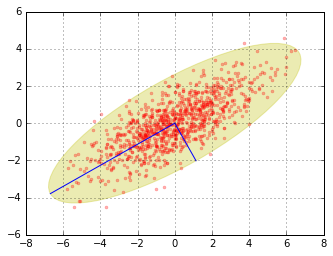

In [3]:
from numpy import sqrt, arctan, pi
from numpy.random import multivariate_normal
from matplotlib.patches import Ellipse

# Priklad - Vykreslenie elipsy kovariancie

X1, X2 = multivariate_normal(m, S, 1000).T

[e1,e2] = e
[v1,v2] = v
w=2*sqrt(e1*9.21)                              # vypocet parametrov elipsy
h=2*sqrt(e2*9.21)
phi=arctan(v1[1] / v1[0])*180/pi


fig = plt.figure(0)                            # konfiguracia kreslenia
ax = fig.add_subplot(111, aspect='equal')

ellipse = Ellipse(xy=(0,0), width=w, height=h, angle=phi)
ellipse.set_color('Y')
ellipse.set_alpha(0.3)
ax.add_artist(ellipse)                         # vykreslenie elipsy

plt.plot(X1, X2, 'r.', alpha=0.3)              # vykreslenie hodnot nahodnej premennej

plt.plot([0, v1[0]*w/2],[0, v1[1]*w/2], 'b-')  # vykreslenie skalovanych vlastnych vektorov
plt.plot([0, v2[0]*h/2],[0, v2[1]*h/2], 'b-')
plt.grid()
plt.show()